# Kaggle House Prices Competition
Available thorugh: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
v0.0 (2020-08-17)

#### Import Modules

In [13]:
# Import base modules
import numpy as np
import pandas as pd

# Import charting tools
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show
output_notebook()

# Import modules for modeling
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

Loading BokehJS ...

#### Import Data, perform EDA and get ready data for Modeling

In [14]:
# Import Data
original_train = pd.read_csv('train.csv', index_col=0)
original_test = pd.read_csv('test.csv', index_col=0)

In [15]:
# Data frame Head
original_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# Data frame Describe
original_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


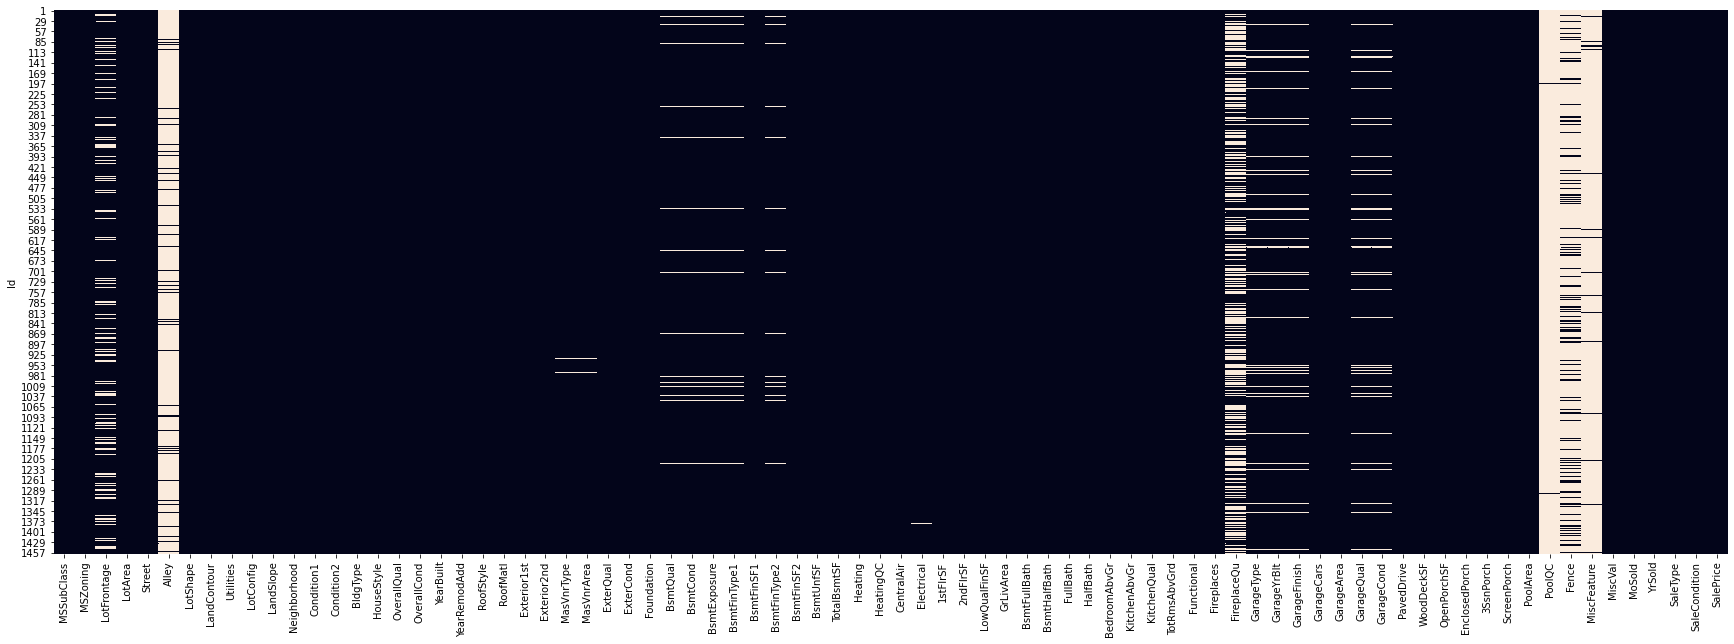

In [20]:
# Create a picture to highlight the missing data
plt.figure(figsize=(30,10))
sns.heatmap(original_train.isnull(), cbar=False)

In [21]:
# Find features that are more than 50% NULL
mostly_empty_features = []
for col in original_train.columns:
    if original_train[col].count()<0.5*original_train[col].size:
        mostly_empty_features.append(col)

print('The following features are mostly empty: ', mostly_empty_features)

The following features are mostly empty:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [22]:
# Combining train and test data to fill NA values in both sets together; set will be split again before modeling
original_test['SalePrice']=0

original_train['Source']=0
original_test['Source']=1

original_combined=pd.concat([original_train, original_test])

In [23]:
# Filling up NA values based on data description

# A lot of fields with NA values in the data correspond to feature being absent; all those NA values are being set to None
None_features= ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType',
               'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Exterior2nd','MasVnrType']

for col in None_features:
    original_combined[col]=original_combined[col].fillna('None')

# Numerical features that indicate absence of a feature are replaced with zero    
Zero_features = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','GarageYrBlt',
                'GarageCars', 'GarageArea']

for col in Zero_features:
    original_combined[col]=original_combined[col].fillna(0)
    
# For remaining columns, the missing value is not obvious so they are being filled with FFILL method
original_combined = original_combined.fillna(method='ffill')
original_combined = original_combined.fillna(method='bfill') # just incase the first row is empty
    
# All categorical values are changed to category; numerical values that are categorical should also be modified
for col in original_combined.columns:
    if original_combined[col].dtype=='object' or col=='MSSubClass':
        original_combined[col]=original_combined[col].astype('category')

In [25]:
# Get dummy variables for all categorical values
original_combined = pd.get_dummies(original_combined)

# Get back to train and test sets
training_set = original_combined[original_combined['Source']==0]
training_set = training_set.drop(columns='Source')

validation_set = original_combined[original_combined['Source']==1]
validation_set = validation_set.drop(columns=['SalePrice', 'Source'])

#### Modeling

In [147]:
# Create a function for cross validation

# Function to run through cross-validation based on user inputs
def eval_cross_validation(X,y,scaler_method,modeling_method, create_kaggle_submission='no'):
    
    # Initialize variables to store error values
    RMSE_list=[]
    RMSE=0
    
    # Select scaling and modeling method based on user input
    if scaler_method=='Standard':
        scaler=StandardScaler()
    elif scaler_method=='MinMax':
        scaler=MinMaxScaler()
    
    if modeling_method=='Linear':
        model = LinearRegression()
    elif modeling_method=='Lasso':
        model=Lasso(max_iter=20000, tol=0.01)
    elif modeling_method=='Ridge':
        model=Ridge()
    elif modeling_method=='ElasticNet':
        model=ElasticNet()
    elif modeling_method=='GradientBoost':
        model=GradientBoostingRegressor()
    
    # Run through 10 fold cross-validation once scaling and model selection is complete 
    kf = KFold(n_splits = 10, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        RMSE_list.append(RMSE)
        
    RMSE_out = np.mean(RMSE_list)
    
    # If needed, create a CSV file that can be submitted to Kaggle
    if create_kaggle_submission=='yes':
        validation_set_scaled=scaler.transform(validation_set[X.columns])
        y_validation_predicted = model.predict(validation_set_scaled)
        y_validation = pd.Series(y_validation_predicted, index =validation_set.index)
        y_validation.to_csv('submission.csv')
    
    return RMSE_out, y_test, y_pred

In [148]:
# Function to create plots of y_test and y_pred
def create_plots(y_test, y_pred, model, scaling):
    
    p = figure(title = 'Test vs. predicted plot for '+model+' model and '+scaling+' scaling.', 
               x_axis_label='y_test', 
               y_axis_label='y_predicted',
               plot_width=950, plot_height=450)
    p.circle(y_test, y_pred, line_width=2, color='blue', legend_label='Pred vs. Test')
    p.title.text_color = "black"
    p.title.text_font_size = "15px"

    # Creating the best fit line between y_test and y_pred
    yy_test=np.array(y_test).reshape(-1,1)
    yy_pred=y_pred.reshape(-1,1)

    linreg =LinearRegression()
    linreg.fit(yy_test, yy_pred)
    yy_fitted = linreg.coef_*yy_test + linreg.intercept_
    
    y_fit=[]
    for n in np.arange(len(yy_fitted)):
            y_fit.append(yy_fitted[n])

    p.line(y_test, y_fit, color='red', line_width=1, line_dash='dashed', legend_label='Fit')
    show(p)

In [149]:
# Create the X and y sets for training
X = training_set.drop(columns='SalePrice')
y = training_set['SalePrice']

In [150]:
# Get results for models with standard scaler
STD_Linear_RMSE_out, STD_Linear_y_test, STD_Linear_y_pred = eval_cross_validation(X,y,'Standard','Linear','no')
STD_Lasso_RMSE_out, STD_Lasso_y_test, STD_Lasso_y_pred = eval_cross_validation(X,y,'Standard','Lasso','no')
STD_Ridge_RMSE_out, STD_Ridge_y_test, STD_Ridge_y_pred = eval_cross_validation(X,y,'Standard','Ridge','no')
STD_ElasticNet_RMSE_out, STD_ElasticNet_y_test, STD_ElasticNet_y_pred = eval_cross_validation(X,y,'Standard','ElasticNet','no')

# Get results for models with MinMaxScaler
MM_Linear_RMSE_out, MM_Linear_y_test, MM_Linear_y_pred = eval_cross_validation(X,y,'MinMax','Linear','no')
MM_Lasso_RMSE_out, MM_Lasso_y_test, MM_Lasso_y_pred = eval_cross_validation(X,y,'MinMax','Lasso','no')
MM_Ridge_RMSE_out, MM_Ridge_y_test, MM_Ridge_y_pred = eval_cross_validation(X,y,'MinMax','Ridge','no')
MM_ElasticNet_RMSE_out, MM_ElasticNet_y_test, MM_ElasticNet_y_pred = eval_cross_validation(X,y,'MinMax','ElasticNet','no')
MM_GradientBoost_RMSE_out, MM_GradientBoost_y_test, MM_GradientBoost_y_pred = eval_cross_validation(X,y,'MinMax','GradientBoost','no')

#### Results

In [154]:
# Compile the cross-validation results
scaling=['Standard','Standard','Standard','Standard','MinMax','MinMax','MinMax','MinMax','MinMax']
models=['Linear', 'Lasso', 'Ridge', 'Elastic', 'Linear', 'Lasso', 'Ridge', 'ElasticNet','GradientBoost']
model_results=[STD_Linear_RMSE_out, STD_Lasso_RMSE_out, STD_Ridge_RMSE_out, STD_ElasticNet_RMSE_out, MM_Linear_RMSE_out,
              MM_Lasso_RMSE_out, MM_Ridge_RMSE_out, MM_ElasticNet_RMSE_out,MM_GradientBoost_RMSE_out]

results = pd.DataFrame({'Scaling':scaling, 'Models':models, 'RMSE':model_results})
results

,Scaling,Models,RMSE
0,Standard,Linear,1.864305e+16
1,Standard,Lasso,4.137316e+04
2,Standard,Ridge,3.397663e+04
3,Standard,Elastic,3.038789e+04
4,MinMax,Linear,2.229641e+14
5,MinMax,Lasso,3.352474e+04
6,MinMax,Ridge,3.108089e+04
7,MinMax,ElasticNet,4.535604e+04
8,MinMax,GradientBoost,2.567585e+04


In [155]:
# Plotting the y_test and y_pred values for MinMaxSclaer and GradientBoost model
create_plots(MM_GradientBoost_y_test, MM_GradientBoost_y_pred, 'GradientBoost', 'MM')

In [156]:
# Plotting the y_test and y_pred values for MinMaxSclaer and Lasso model
create_plots(MM_Lasso_y_test, MM_Lasso_y_pred, 'Lasso', 'MM')

In [159]:
# Perform the best sub-set selection on the GradientBoost model with MinMaxScaler
import itertools

collection_k=[]
collection_combo=[]
collection_score=[]

best_k=[x for x in np.arange(len(X.columns))]
best_combo=[{} for x in np.arange(len(X.columns))]
best_score=[np.inf for x in np.arange(len(X.columns))]

remaining_features = list(X.columns.values)
features=[]
used_features=[]
training_score=[]

# Implement the best subselection algorithm
for k in np.arange(len(X.columns)):
    #print(k)
    for combo in itertools.combinations(remaining_features, 1):
        # Split into training and test sets
        RMSE, y_test, y_pred = eval_cross_validation(X[list(combo)+features],y,'MinMax','GradientBoost','no')
        
        collection_k.append(k+1)
        collection_combo.append(combo)
        collection_score.append(RMSE)
        
        if RMSE<best_score[k]:
            best_score[k] = RMSE
            best_combo[k] = combo
            best_k[k] = k+1
            best_feature = combo[0]
    
    remaining_features.remove(best_feature)
    features.append(best_feature)
    print('For',k+1,'feature(s), best RMSE is:',best_score[k].round(0), 'and includes ',best_combo[:k+1],'.')
    if k>1 and best_score[k]>0.99*best_score[k-1]:
        break
    
results = pd.DataFrame([best_k, best_combo, best_score])

p=figure(plot_width=950, plot_height=400, 
         title='RMSE vs. # of Predictors (Forward Subset Selection)',
        x_axis_label='Number of Features',
        y_axis_label='RMSE values')
p.title.text_color = "black"
p.title.text_font_size = "15px"
p.circle(collection_k,collection_score, legend_label='Model RMSE')
p.line(best_k,best_score, color='red', legend_label='Best RMSE', line_width=2)
show(p)

For 1 feature(s), best RMSE is: 44852.0 and includes  [('OverallQual',)] .
For 2 feature(s), best RMSE is: 37339.0 and includes  [('OverallQual',), ('GrLivArea',)] .
For 3 feature(s), best RMSE is: 33242.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',)] .
For 4 feature(s), best RMSE is: 29877.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',), ('BsmtFinSF1',)] .
For 5 feature(s), best RMSE is: 28420.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',), ('BsmtFinSF1',), ('1stFlrSF',)] .
For 6 feature(s), best RMSE is: 27112.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',), ('BsmtFinSF1',), ('1stFlrSF',), ('OverallCond',)] .
For 7 feature(s), best RMSE is: 26095.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',), ('BsmtFinSF1',), ('1stFlrSF',), ('OverallCond',), ('Neighborhood_Edwards',)] .
For 8 feature(s), best RMSE is: 25960.0 and includes  [('OverallQual',), ('GrLivArea',), ('YearBuilt',), ('BsmtFinSF1',), (

In [161]:
# We now save results with the best subset features gradient boosting model for submission to Kaggle
X_11F = training_set[['OverallQual', 'GrLivArea','YearBuilt','BsmtFinSF1','Neighborhood_Edwards','MSZoning_RM','OverallCond',
                     'BsmtExposure_No','FireplaceQu_None','MSSubClass_160','Street_Pave']]
y_11F = training_set['SalePrice']

MM_GB_RMSE_out, MM_GB_y_test, MM_GB_y_pred = eval_cross_validation(X_11F,y_11F,'MinMax','GradientBoost','yes')
#print(MM_GB_RMSE_out)
create_plots(MM_GB_y_test, MM_GB_y_pred, 'GB', 'MM')